In [1]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten
from scipy import stats
%matplotlib inline

In [152]:
ev = pd.read_csv('./everything.csv', skiprows=1, usecols=[2,3,4,5], header=None, names=["rand", "s2", "num", "lat", "lng", "time"])
mon = pd.read_csv('./pokemon.csv', skiprows=1, usecols=[3,4,5,6], names=["num", "lat", "lng", "time"], low_memory=False)
loc = pd.read_csv('./pokeloc.csv', skiprows=1, usecols=[1,4,5,6], names=["num","time", "lat", "lng"], low_memory=False)
frames = [ev, mon, loc]
mons = pd.concat(frames, ignore_index=True)
mons.last_valid_index()

9252095

In [37]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort()
    fig=plt.figure(figsize=(40,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='k')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)



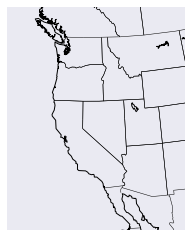

In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(projection='ortho',lon_0=-119,lat_0=37,resolution='l',\
             llcrnrx=-1000*1000,llcrnry=-1000*1000,
             urcrnrx=+1150*1000,urcrnry=+1700*1000)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
 
plt.show()

In [33]:
mons.head()

,lat,lng,num,time
0,34.770665,-86.634538,118,2016-07-28 19:19:18
1,34.647576,-86.554938,16,2016-07-30 14:20:37
2,34.676097,-86.764851,129,2016-07-26 19:28:34
3,34.750431,-86.632490,16,2016-07-30 01:45:26
4,34.707048,-86.586005,48,2016-08-02 19:05:26


In [54]:
mons['lat'].as_matrix()

array([ 34.77066461,  34.64757556,  34.67609671, ...,  48.11985359,
        48.1221494 ,  48.12066736])

In [6]:
print mons.query('36<lat<38')['lat'].shape
print mons.query('36<lat<38')['lng'].shape

(228875,)
(228875,)


In [68]:
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors


In [197]:
# example showing how to plot scattered data with hexbin.

# create north polar stereographic basemap
# bay area
m = Basemap(width=120000,height=120000,lon_0=-122.0,lat_0=37.6,lon_1=-121.4,lat_1=38.8, projection='lcc',resolution='h')
#world
#m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='c')
#east coast
#m = Basemap(projection='mill',llcrnrlat=30,urcrnrlat=46, llcrnrlon=-92,urcrnrlon=-60,resolution='c')
#germany + nether
#m = Basemap(projection='mill',llcrnrlat=40,urcrnrlat=54, llcrnrlon=0,urcrnrlon=14,resolution='l')
#germany
#m = Basemap(width=100000,height=100000,lon_0=13.408080,lat_0=52.515116,lon_1=-121.5,lat_1=39, projection='lcc',resolution='h')


#m = Basemap(lon_0=-105,lat_0=40,projection='ortho')
#m.bluemarble()

#m = Basemap(projection='ortho',lon_0=-122.2829538,lat_0=37.5915934,resolution='l',\
#             llcrnrx=-400*1000,llcrnry=-400*1000,
#             urcrnrx=+300*1000,urcrnry=+300*1000)


In [198]:

def colorbar_index(ncolors, cmap):
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki])
                       for i in xrange(N+1) ]
    # Return colormap object.
    return mcolors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)


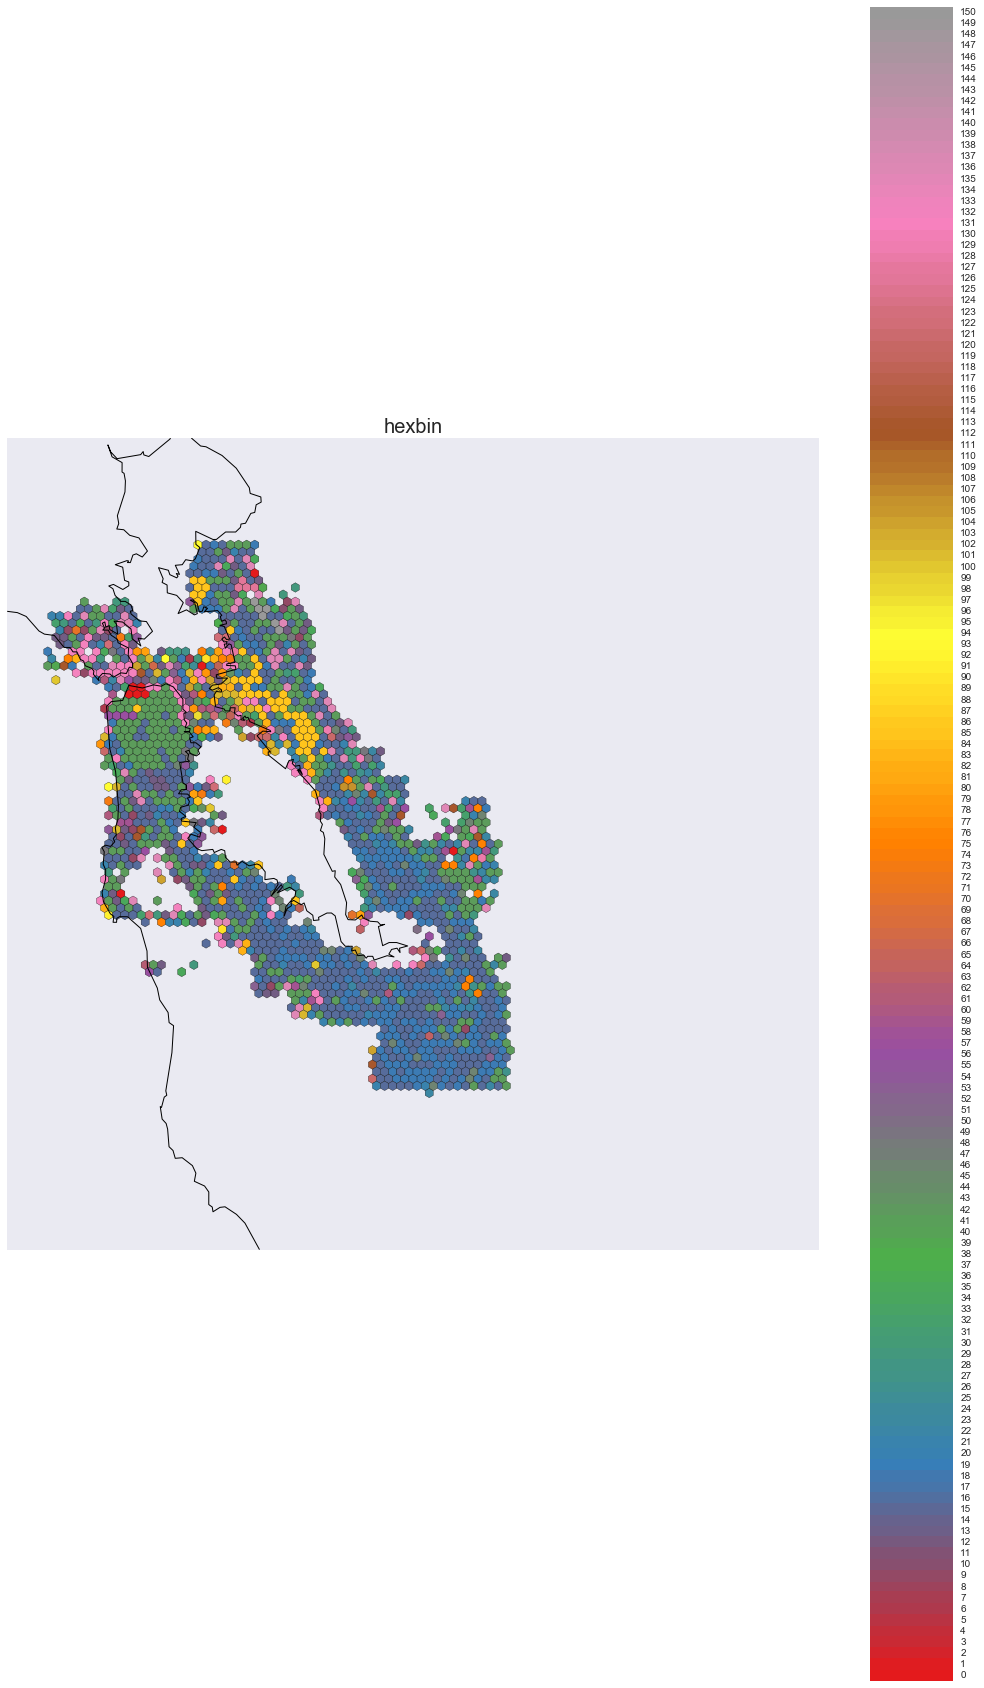

In [199]:


# number of points, bins to plot.
bins = 100

# generate random points on a sphere,
# so that every small area on the sphere is expected
# to have the same number of points.
# http://mathworld.wolfram.com/SpherePointPicking.html
filtered_mon = mon
#filtered_mon =  mons.query('num != 16 and num != 41 and num != 19 and num != 21 and num != 13 and num != 96 and num != 50')
#filtered_mon =  mons.query('36<lat<38 and num > 98 and num < 104 ')

lats = filtered_mon['lat'].as_matrix()
lons = filtered_mon['lng'].as_matrix()
nums = filtered_mon['num'].as_matrix()
# convert to map projection coordinates.
x, y = m(lons, lats)


# make plot using hexbin
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(121)

def reduce_c(x):
    return stats.mode(x)[0][0]

colormap = plt.cm.Set1

#CS = m.hexbin(x,y,gridsize=bins,cmap=plt.cm.jet, extent=[m.xmin,m.xmax,m.ymin,m.ymax])
CS = m.hexbin(x,y,C=nums,reduce_C_function=reduce_c, gridsize=bins,cmap=colormap,
             extent=[m.xmin,m.xmax,m.ymin,m.ymax], edgecolor='black')
# draw coastlines, lat/lon lines.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

#m.drawparallels(np.arange(0,81,20))
#m.drawmeridians(np.arange(-180,181,60))


#cb = m.colorbar(location="bottom",label="Z", drawedges=True) # draw colorbar
#cb.ax.minorticks_on()
colorbar_index(ncolors=151, cmap=colormap)   

plt.title('hexbin', fontsize=20)


plt.gcf().set_size_inches(40,30)
plt.show()

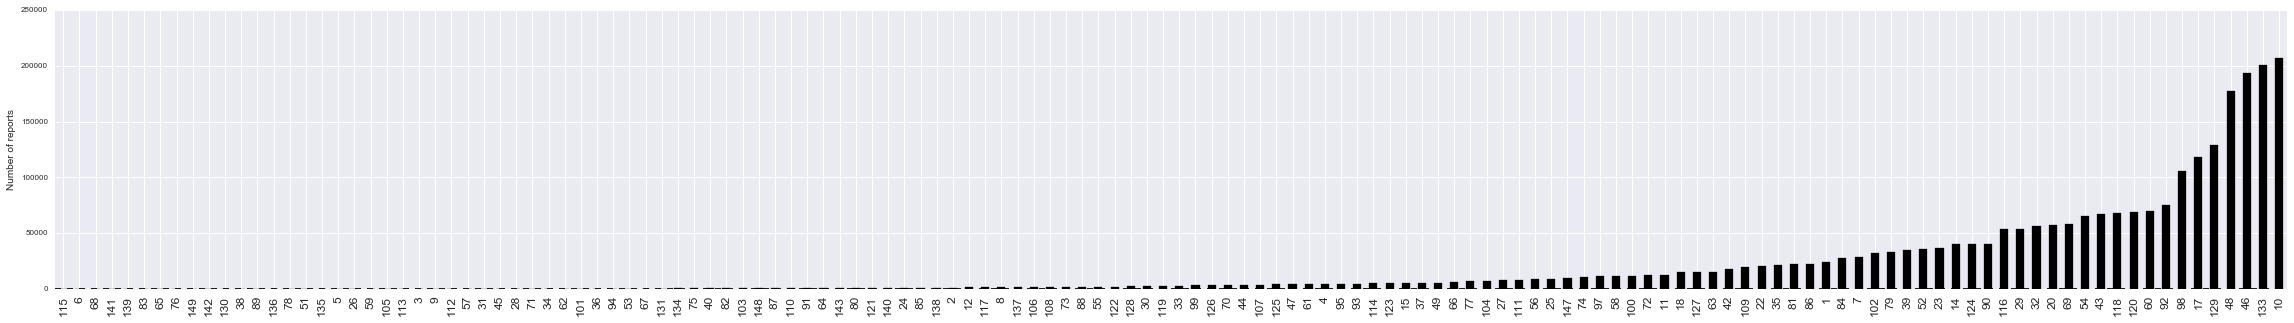

In [177]:
plotdat(filtered_mon,'num')